In [42]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, train_test_split

#ALgorthims
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron 
#Mesures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score ,RepeatedStratifiedKFold



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Reading Dataset  
df=pd.read_csv('/content/healthcare-dataset-stroke-data(1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
#Drop id 
df.drop(columns=['id'],inplace=True) 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [47]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
df.isna()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [49]:
#null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [50]:
# Imputing the missing values with the mean
df=df.fillna(np.mean(df['bmi']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [51]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


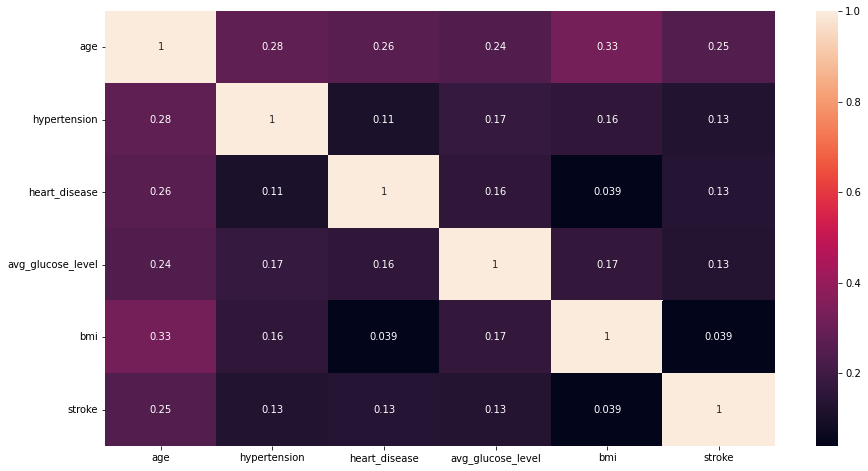

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [53]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [54]:
# Removing the observations that have smoking_status type unknown. 
df=df[df['smoking_status']!='Unknown']

In [55]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,Private,0,77.93,21.700000,never smoked,0
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0


In [56]:
# used One Hot encoding smoking_status, work_type
data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
data_dummies

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
5102,0,1,0,0,0,1,0,0
5105,0,1,0,0,0,1,0,0
5106,0,1,0,0,0,0,1,0
5107,0,1,0,0,0,0,1,0


In [58]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1
1,0,61.0,0,0,1,0,202.21,28.893237,1
2,1,80.0,0,1,1,0,105.92,32.500000,1
3,0,49.0,0,0,1,1,171.23,34.400000,1
4,0,79.0,1,0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0


In [59]:
y=df['stroke']
df.drop(columns=['stroke'],inplace=True)
x=df.merge(data_dummies,left_index=True, right_index=True,how='left')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2852, 16)
(714, 16)
(2852,)
(714,)


In [64]:
from imblearn.over_sampling import SMOTE

over = SMOTE(random_state=0)

In [65]:
#Oversampling X and y only on training data
X_train_os, Y_train_os = over.fit_resample(X_train, Y_train)

In [66]:
model_dict = {
    'Decison Tree':
    DecisionTreeClassifier(random_state=0, class_weight='balanced'),
    'Random Forest Classifier':
    RandomForestClassifier(random_state=0, class_weight='balanced'),
    'Perceptron ':
    Perceptron(),
    'Naive Bayes':
    GaussianNB()   
}

In [67]:
# Lists to create metrics dataframe later on
model_list = []
train_acc_list = []
counter_list = []
test_acc = []
test_precision = []
test_recall = []
test_f1=[]

# Main model loop
for model, clf in model_dict.items():
    print('Running on '+model)
    print(40*'=')
    # Fitting the model to train data
    clf.fit(X_train_os, Y_train_os)
    
    # Making predictions
    predictions = clf.predict(X_test)
    
    # Getting model accuracy on test data
    acc = accuracy_score(Y_test, predictions)
    
    # Getting train predictions
    train_pred = clf.predict(X_train_os)
    
    # Training accuracy
    train_acc = accuracy_score(Y_train_os, train_pred)
    
    # Counting predicted target classes
    counter = Counter(predictions)
    
    # Getting precision, recall and f1
    report = precision_recall_fscore_support(Y_test, predictions, average='binary')
    
    # Printing classification report
    print('Classification report for '+model)
    print(classification_report(Y_test, predictions))
    print(40*'=')

    # Saving info to lists
    model_list.append(model)
    train_acc_list.append(train_acc)
    counter_list.append(counter)
    test_acc.append(acc)
    test_precision.append(report[0])
    test_recall.append(report[1])
    test_f1.append(report[2])

# Putting it all together in the dataframe
results = pd.DataFrame({
    "model": model_list,
    "accuracy(training phase)": train_acc_list,
    'accuracy(testing phase)': test_acc,
    'precision': test_precision,
    'recall': test_recall,
    'f1-score': test_f1,
    'counter': counter_list
})

Running on Decison Tree
Classification report for Decison Tree
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       675
           1       0.07      0.10      0.09        39

    accuracy                           0.88       714
   macro avg       0.51      0.51      0.51       714
weighted avg       0.90      0.88      0.89       714

Running on Random Forest Classifier
Classification report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       675
           1       0.12      0.05      0.07        39

    accuracy                           0.93       714
   macro avg       0.53      0.51      0.52       714
weighted avg       0.90      0.93      0.91       714

Running on Perceptron 
Classification report for Perceptron 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       675
           1       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [68]:
results

,model,accuracy(training phase),accuracy(testing phase),precision,recall,f1-score,counter
0,Decison Tree,1.000000,0.879552,0.072727,0.102564,0.085106,"{0: 659, 1: 55}"
1,Random Forest Classifier,1.000000,0.927171,0.117647,0.051282,0.071429,"{0: 697, 1: 17}"
2,Perceptron,0.500000,0.945378,0.000000,0.000000,0.000000,{0: 714}
3,Naive Bayes,0.654332,0.357143,0.074899,0.948718,0.138837,"{1: 494, 0: 220}"


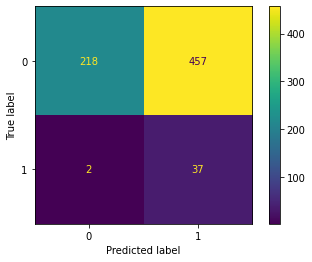

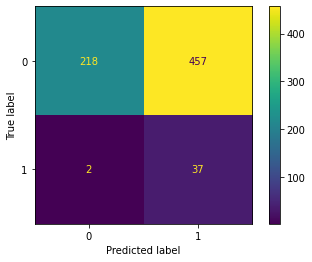

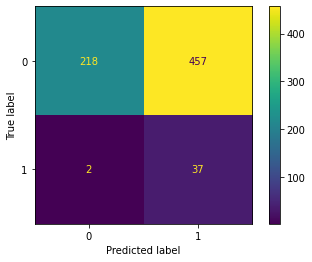

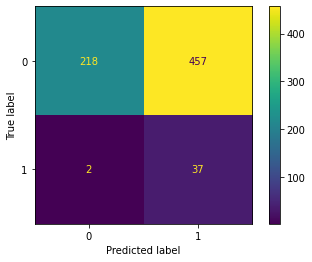

In [69]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
tree=tree.DecisionTreeClassifier()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


from sklearn.linear_model import Perceptron
per=Perceptron()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


disp.plot()
disp.plot()
disp.plot()
disp.plot()


In [72]:
#cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, y, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)



from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X, y = load_iris(return_X_y=True)
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron 
X, y = load_iris(return_X_y=True)
per = Perceptron ()
scores = cross_val_score(per, X, y, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)


from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
nb = GaussianNB()
scores = cross_val_score(nb, X, y, cv=5, scoring="accuracy")
print(scores)
meanScore = scores.mean()
print(meanScore * 100)

[0.96666667 0.96666667 0.9        1.         1.        ]
96.66666666666669
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
96.0
[0.66666667 0.7        0.76666667 0.83333333 0.66666667]
72.66666666666667
[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
95.33333333333334


In [74]:
# Lists to create metrics dataframe later on
model_list = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []
test_roc = []

over = SMOTE(random_state=0)

for model, clf in model_dict.items():
    print('Running on ' + model)
    print(40 * '=')

    # Defining the pipeline
    pipeline = make_pipeline(over, clf)

    # Stratified cv
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

    scores = cross_validate(pipeline,
                            X_test,
                            Y_test,
                            scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                            cv=cv,
                            n_jobs=-1)

    model_list.append(model)
    test_acc.append(scores['test_accuracy'].mean())
    test_precision.append(scores['test_precision'].mean())
    test_recall.append(scores['test_recall'].mean())
    test_f1.append(scores['test_f1'].mean())
    test_roc.append(scores['test_roc_auc'].mean())

# Putting it all together in the dataframe
results_cv = pd.DataFrame({
    "model": model_list,
    "accuracy(training phase)": train_acc_list,
    'accuracy(testing phase)': test_acc,
    'precision': test_precision,
    'recall': test_recall,
    'f1-score': test_f1,
})

Running on Decison Tree
Running on Random Forest Classifier
Running on Perceptron 
Running on Naive Bayes


In [75]:
results_cv

,model,accuracy(training phase),accuracy(testing phase),precision,recall,f1-score
0,Decison Tree,1.000000,0.869273,0.071171,0.117857,0.085252
1,Random Forest Classifier,1.000000,0.915979,0.087037,0.060714,0.069233
2,Perceptron,0.500000,0.655337,0.075419,0.514286,0.125664
3,Naive Bayes,0.654332,0.323491,0.052391,0.676190,0.097134


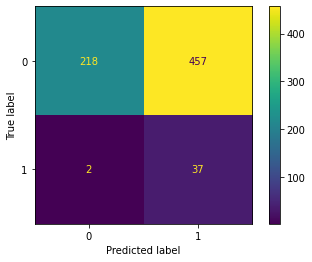

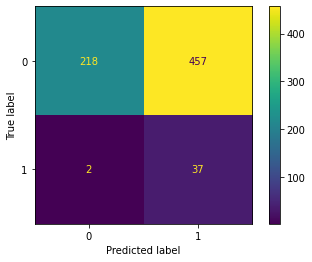

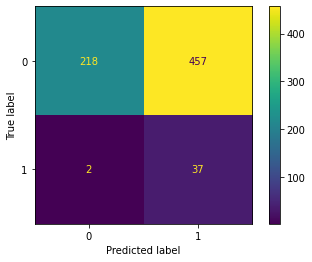

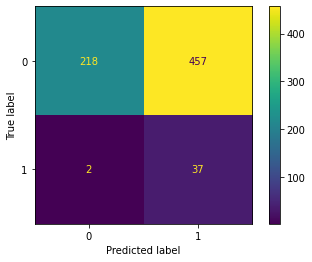

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
tree=tree.DecisionTreeClassifier()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


from sklearn.linear_model import Perceptron
per=Perceptron()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
cm = confusion_matrix(Y_test,predictions,labels=pd.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(Y_test))


disp.plot()
disp.plot()
disp.plot()
disp.plot()


In [77]:
!pip install nbconvert

In [78]:
!jupyter nbconvert --to html Stroke.ipynb

[NbConvertApp] Converting notebook Stroke.ipynb to html
[NbConvertApp] Writing 537141 bytes to Stroke.html
